# Logistic Regression

In [3]:
import numpy as np
from matplotlib import pyplot as plt

Sigmoid Function with plot

In [24]:
# Sigmoid function
def sigmoid(x):
    """Returns the value of sigmoid x
    
    :param x: The input value for the function
    :type x: int, float or np.array
    :returns: Float value of sigmoid x
    """
    return 1/(1+ np.exp(-x))

Text(0.5,1,'Sigmoid Function')

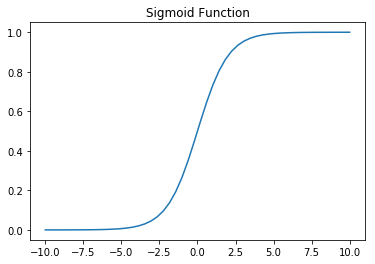

In [12]:
x_vals = np.linspace(-10, 10)
plt.plot(x_vals, sigmoid(x_vals))
plt.title('Sigmoid Function')

Hypothesis Function

In [34]:
def hypothesis(theta, x):
    """Hypothesis function for logistic regression
    
    :param theta: Array of predictors
    :param x: Array of sample values
    :type theta: np.array
    :type x: np.array
    :returns: Hypothesis value of the sample values
    """
    return sigmoid(np.dot(theta.T, x))

Cost Function

In [35]:
def cost(theta, x, y):
    """Cost function for a prediction
    
    :param theta: Array of predictors
    :param x: Array of sample values, must be of same length as
        param theta
    :param y: Population value for sample values, 0 or 1
    :type theta: np.array
    :type x: np.array
    :type y: int
    """
    return (1 / 2) * (hypothesis(theta, x) - y) ** 2

In [ ]:
def j_cost(theta, x, y):
    m = 

In [38]:
cost(np.array([1, 0.2, 20, 3, -1]), np.array([2, 32, 3, 2, 10]), 0)

0.5